# - Two Layer CNN model with 32 and 64 neurons
# - Model achieved 91% accuracy with 32% loss

# Fashion mnist


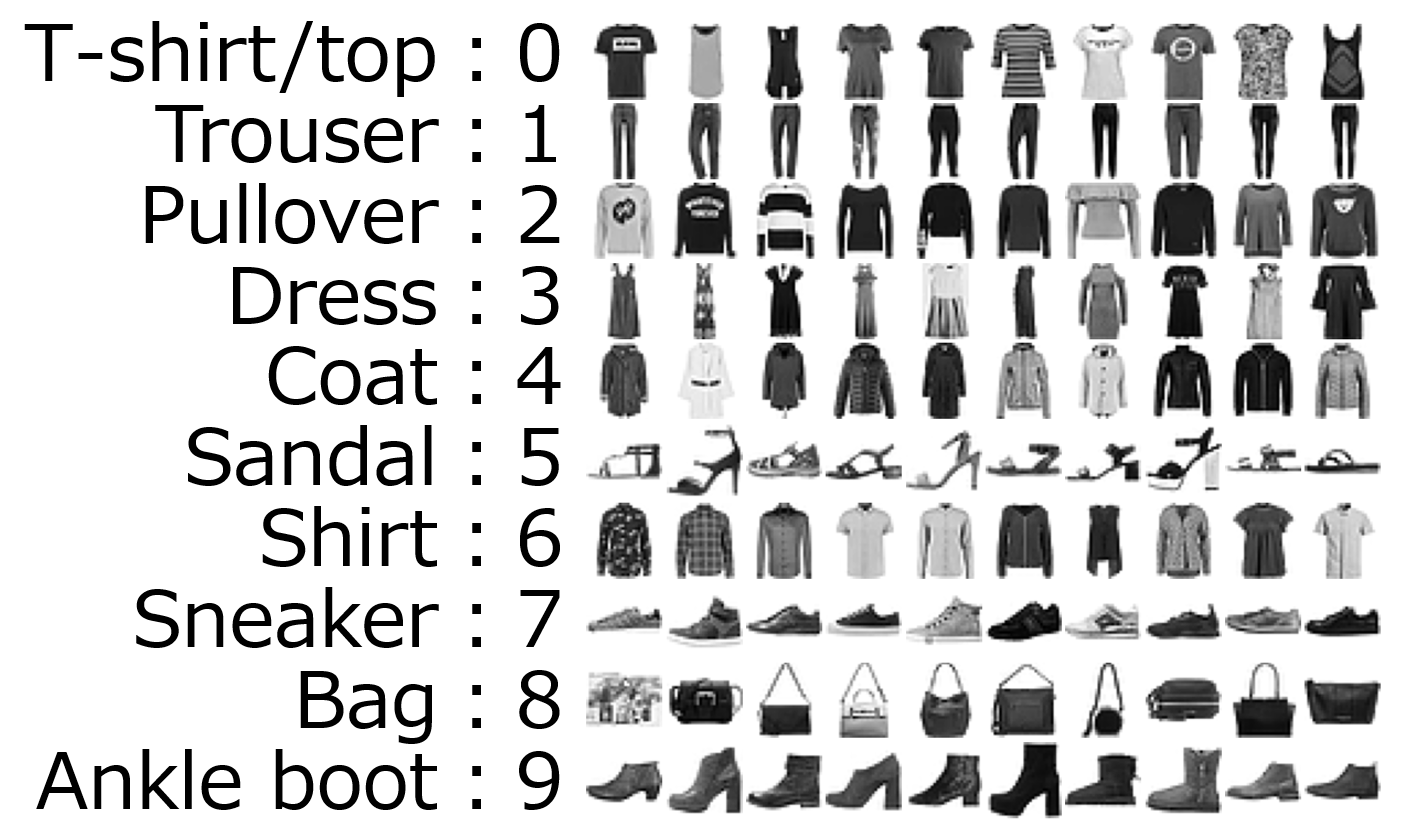

Please upvote if you like my approach or if you learned something from this notebook. Your support gives me motivation to create interesting stuff. Thank you.
 <img src= "https://bea.stollnitz.com/images/fashion-pytorch/1-fashion-nn.png" alt ="nuroal network "  align="center" style='width: 800px;' >

# import the libraries 

In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import backend as k
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
BATCH_SIZE = 32 
EPOCH = 10
NUMBER_OF_CLASSES = 10 
IMG_ROWS, IMG_COLS = 28, 28 
INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# load the data 


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train,Y_train),(X_test,Y_test)= fashion_mnist.load_data()
x_train,x_validate,y_train,y_validate = train_test_split(X_train,Y_train,test_size = 0.2,random_state = 12345)

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_validate = x_validate.reshape(x_validate.shape[0], 1, IMG_ROWS, IMG_COLS)
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)
else:
    x_train = x_train.reshape(x_train.shape[0],IMG_ROWS, IMG_COLS, 1)
    x_test = X_test.reshape(X_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    x_validate = x_validate.reshape(x_validate.shape[0], IMG_ROWS, IMG_COLS, 1)
    INPUT_SHAPE = ( IMG_ROWS, IMG_COLS,1)
    

# normalize the train and test data 
x_train = x_train / 255.0
x_test = x_test / 255.0
x_validate = x_validate / 255.0

print('the test shape', x_train.shape)
print('the train shape', x_test.shape)
print('the validation shape', x_validate.shape)

the test shape (48000, 28, 28, 1)
the train shape (10000, 28, 28, 1)
the validation shape (12000, 28, 28, 1)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUMBER_OF_CLASSES)
y_test = keras.utils.to_categorical(Y_test, NUMBER_OF_CLASSES)
y_validate = keras.utils.to_categorical(y_validate, NUMBER_OF_CLASSES)
print('y train shape', y_train.shape)
print('y test shape', y_test.shape)
print('y validate shape', y_validate.shape)
Y_train

y train shape (48000, 10)
y test shape (10000, 10)
y validate shape (12000, 10)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

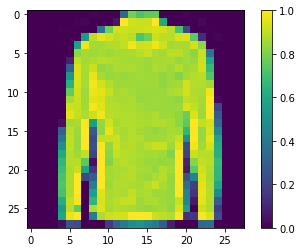

In [ ]:
plt.figure()
plt.imshow((tf.squeeze(x_train[1])))
plt.colorbar()
plt.grid(False)
plt.show()

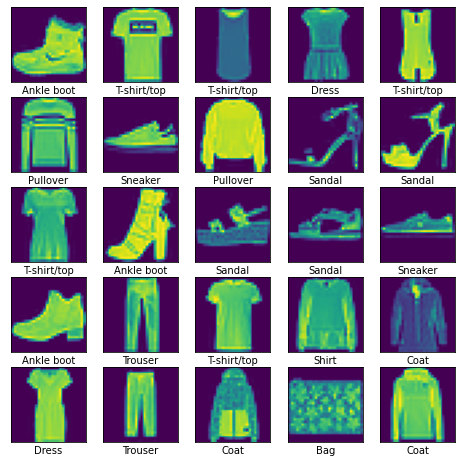

In [ ]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(X_train[i]))#, cmap='gray',vmin=0, vmax=255)
    plt.xlabel(CLASS_NAMES[Y_train[i]])
plt.show()

# creating the neural network 

In [ ]:

model = Sequential()

model.add(
    Conv2D(32, kernel_size = (3,3),
    activation= 'relu', input_shape = INPUT_SHAPE) )
model.add(Conv2D(64, kernel_size = (3,3),
             activation= 'relu')) 
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten()) 
model.add(Dense(100,  activation='relu')) 
model.add(Dense(NUMBER_OF_CLASSES,  activation= 'softmax'))
    


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 100)               921700    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        


# ploting the model 

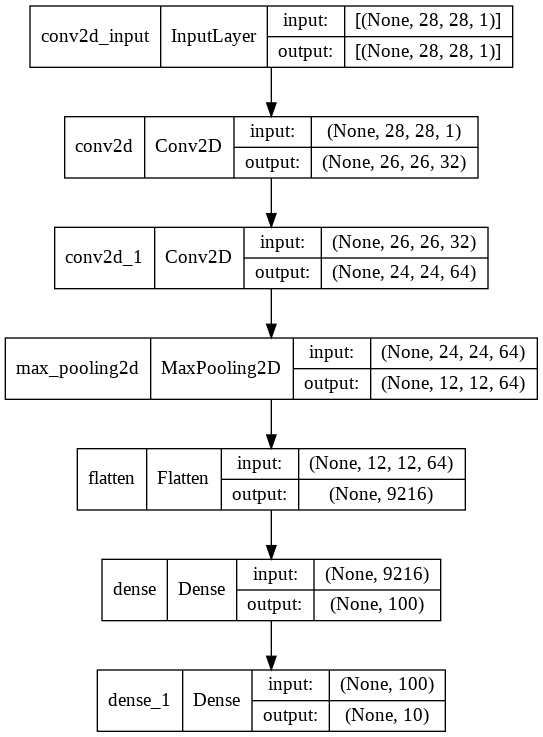

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss= keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              metrics=['accuracy'])


In [ ]:

history=model.fit(x_train, 
                  y_train,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCH,
                  verbose=1 , 
                  validation_data=(x_validate, y_validate)
                  #callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
                  )


Epoch 1/10
1500/1500 [==============================] - 23s 10ms/step - loss: 0.5000 - accuracy: 0.8185 - val_loss: 0.3277 - val_accuracy: 0.8815
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3094 - accuracy: 0.8862 - val_loss: 0.3010 - val_accuracy: 0.8879
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2563 - accuracy: 0.9052 - val_loss: 0.2622 - val_accuracy: 0.9028
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2182 - accuracy: 0.9189 - val_loss: 0.2552 - val_accuracy: 0.9094
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1890 - accuracy: 0.9299 - val_loss: 0.2273 - val_accuracy: 0.9184
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1632 - accuracy: 0.9388 - val_loss: 0.2316 - val_accuracy: 0.9191
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1358 - accuracy: 0.9487 - val_loss: 0.2512 - val_a

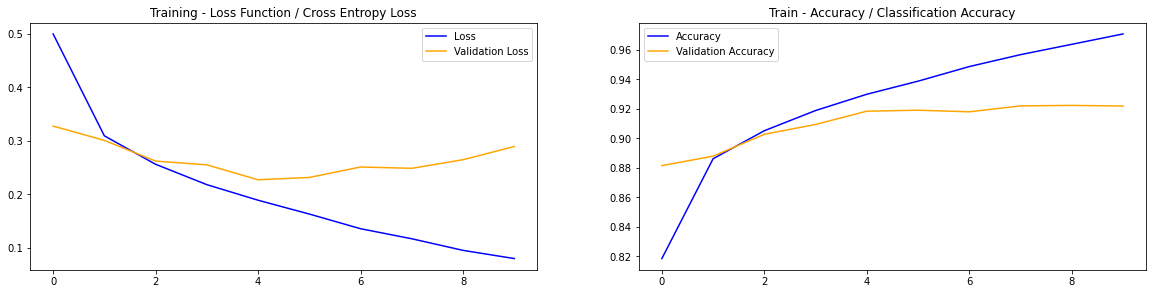

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'],color='blue', label='Loss')
plt.plot(history.history['val_loss'],color='orange', label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function / Cross Entropy Loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'],color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'],color='orange', label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy / Classification Accuracy')
plt.show()

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss=',score[0])
print('Test_accuarcy',score[1])

Test loss= 0.3323163688182831
Test_accuarcy 0.9110999703407288


# Make predictions
With the model trained, we can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test)

In [ ]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.2319693 ],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
Y_test[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(CLASS_NAMES[predicted_label],
                                100*np.max(predictions_array),
                                CLASS_NAMES[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions
With the model trained, we can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

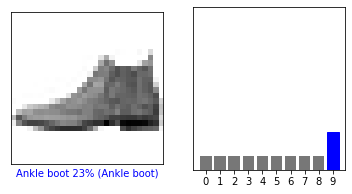

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

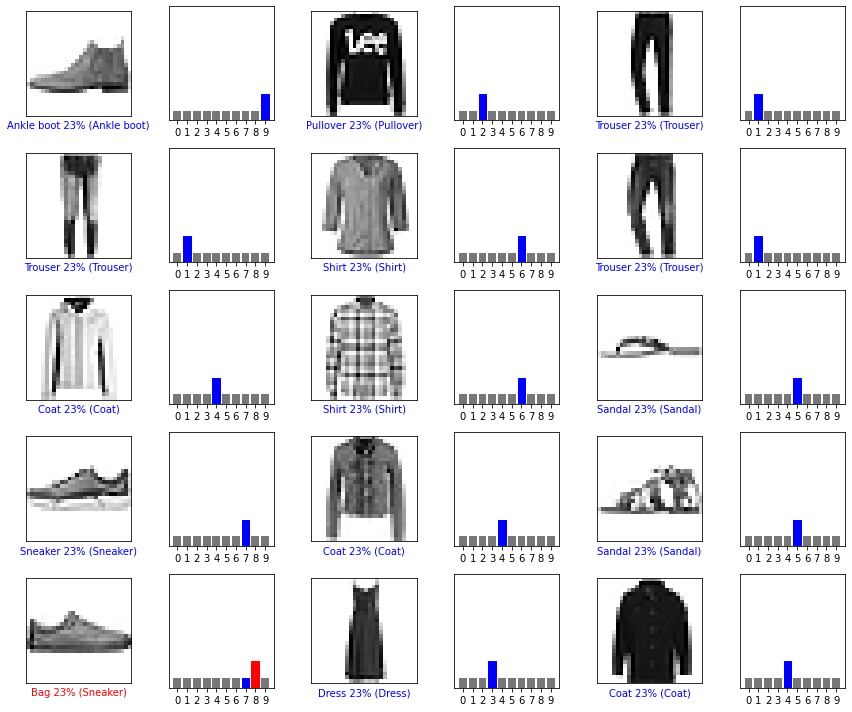

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()